In [102]:
import cv2
import numpy as np
from skimage.measure import compare_ssim
from matplotlib import pyplot as plt

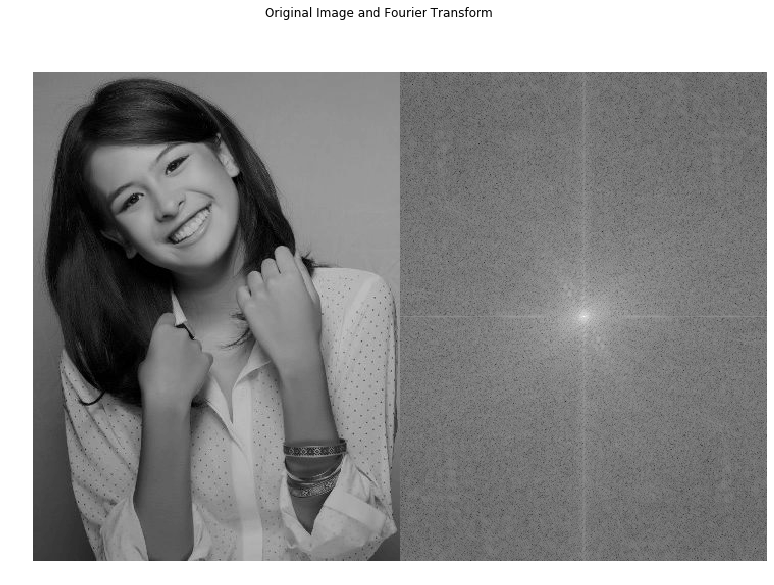

In [103]:
img = cv2.imread('maudy.jpg',0)

# Transforming
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Showing
plt.figure(figsize=(12 * 2, 9))
plt.axis('off')
plt.suptitle('Original Image and Fourier Transform')
img_and_magnitude = np.concatenate((img, magnitude_spectrum), axis=1)
plt.imshow(img_and_magnitude, cmap = 'gray')
plt.show()

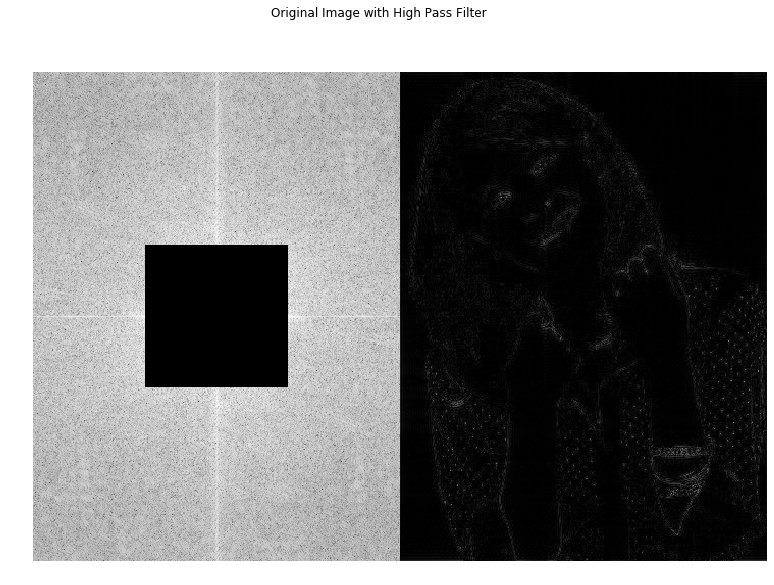

In [104]:
# Masking
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2)
rmax = 70
hpf_fshift = np.copy(fshift)
hpf_fshift[crow-rmax:crow+rmax, ccol-rmax:ccol+rmax] = 1
hpf_magnitude_spectrum = 20*np.log(np.abs(hpf_fshift))

# Inverting
hpf_ishift = np.fft.ifftshift(hpf_fshift)
hpf_img = np.fft.ifft2(hpf_ishift)
hpf_img = np.abs(hpf_img)

# Show result
plt.figure(figsize=(12 * 2, 9))
plt.suptitle('Original Image with High Pass Filter')
plt.axis('off')
hpf_img_and_magnitude = np.concatenate((hpf_magnitude_spectrum, hpf_img), axis=1)
plt.imshow(hpf_img_and_magnitude, cmap = 'gray')
plt.show()

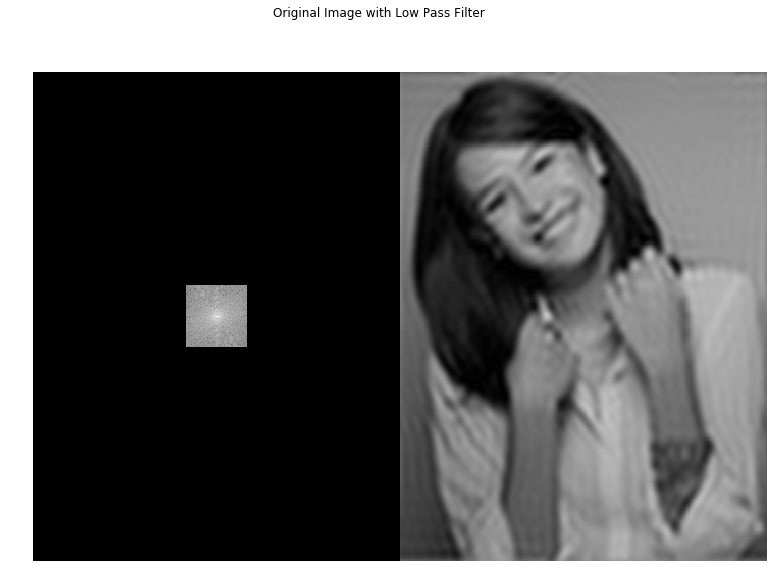

In [105]:
# Masking
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2)
rmin = 30
lpf_fshift = np.copy(fshift)
lpf_fshift[0:crow-rmin] = 1
lpf_fshift[:, 0:ccol-rmin] = 1
lpf_fshift[crow+rmin:rows] = 1
lpf_fshift[:, ccol+rmin:cols] = 1
lpf_magnitude_spectrum = 20*np.log(np.abs(lpf_fshift))

# Inverting
lpf_ishift = np.fft.ifftshift(lpf_fshift)
lpf_img = np.fft.ifft2(lpf_ishift)
lpf_img = np.abs(lpf_img)

# Show result
plt.figure(figsize=(12 * 2, 9))
plt.suptitle('Original Image with Low Pass Filter')
plt.axis('off')
lpf_img_and_magnitude = np.concatenate((lpf_magnitude_spectrum, lpf_img), axis=1)
plt.imshow(lpf_img_and_magnitude, cmap = 'gray')
plt.show()

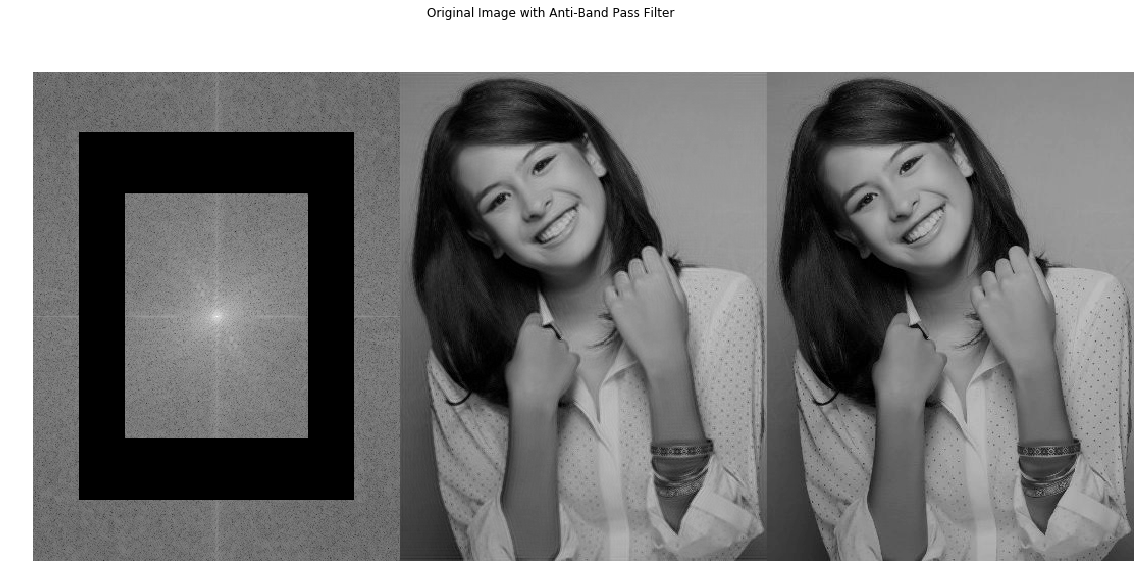

SSIM: 0.9379046392263477


In [108]:
# Masking
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2)
ymin, ymax = int(2*rows/8), int(3*rows/8)
xmin, xmax = int(2*cols/8), int(3*cols/8)
xpf_fshift = np.copy(fshift)
xpf_fshift[crow-ymax:crow-ymin, ccol-xmax:ccol+xmax] = 1
xpf_fshift[crow+ymin:crow+ymax, ccol-xmax:ccol+xmax] = 1
xpf_fshift[crow-ymax:crow+ymax, ccol-xmax:ccol-xmin] = 1
xpf_fshift[crow-ymax:crow+ymax, ccol+xmin:ccol+xmax] = 1
xpf_magnitude_spectrum = 20*np.log(np.abs(xpf_fshift))

# Inverting
xpf_ishift = np.fft.ifftshift(xpf_fshift)
xpf_img = np.fft.ifft2(xpf_ishift)
xpf_img = np.abs(xpf_img)

# Show result
plt.figure(figsize=(12 * 3, 9))
plt.suptitle('Original Image with Anti-Band Pass Filter')
plt.axis('off')
xpf_img_and_magnitude = np.concatenate((xpf_magnitude_spectrum, xpf_img, img), axis=1)
plt.imshow(xpf_img_and_magnitude, cmap = 'gray')
plt.show()

# Calculate differenct
(score, diff) = compare_ssim(img, xpf_img, full=True)
print("SSIM: {}".format(score))

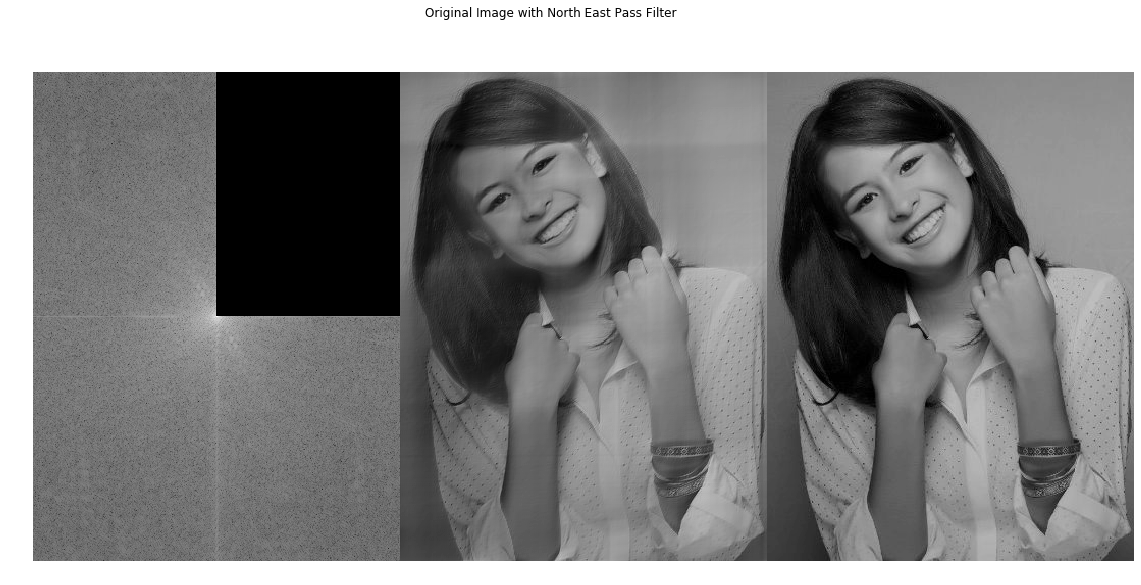

SSIM: 0.8688237463738737


In [107]:
# Masking
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2)
nepf_fshift = np.copy(fshift)
nepf_fshift[0:crow, ccol:cols] = 1
nepf_magnitude_spectrum = 20*np.log(np.abs(nepf_fshift))

# Inverting
nepf_ishift = np.fft.ifftshift(nepf_fshift)
nepf_img = np.fft.ifft2(nepf_ishift)
nepf_img = np.abs(nepf_img)

# Show result
plt.figure(figsize=(12 * 3, 9))
plt.suptitle('Original Image with North East Pass Filter')
plt.axis('off')
nepf_img_and_magnitude = np.concatenate((nepf_magnitude_spectrum, nepf_img, img), axis=1)
plt.imshow(nepf_img_and_magnitude, cmap = 'gray')
plt.show()

# Calculate differenct
(score, diff) = compare_ssim(img, nepf_img, full=True)
print("SSIM: {}".format(score))